<a href="https://colab.research.google.com/github/vishva2410/Student_Score_prediction/blob/main/Student_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('student-scores.csv')
df.head(5)

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [ ]:
df['average_score'] = df[['math_score', 'history_score', 'physics_score',
                         'chemistry_score', 'biology_score',
                         'english_score', 'geography_score']].mean(axis=1)

print(df.head(5))


   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1         

In [ ]:
df.isnull().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
average_score                 0
dtype: int64

In [ ]:
df.dropna

<bound method DataFrame.dropna of         id first_name last_name                                    email  \
0        1       Paul     Casey           paul.casey.1@gslingacademy.com   
1        2   Danielle  Sandoval    danielle.sandoval.2@gslingacademy.com   
2        3       Tina   Andrews         tina.andrews.3@gslingacademy.com   
3        4       Tara     Clark           tara.clark.4@gslingacademy.com   
4        5    Anthony    Campos       anthony.campos.5@gslingacademy.com   
...    ...        ...       ...                                      ...   
1995  1996       Alan  Reynolds     alan.reynolds.1996@gslingacademy.com   
1996  1997     Thomas   Gilbert    thomas.gilbert.1997@gslingacademy.com   
1997  1998    Madison     Cross     madison.cross.1998@gslingacademy.com   
1998  1999   Brittany   Compton  brittany.compton.1999@gslingacademy.com   
1999  2000    Natalie     Smith     natalie.smith.2000@gslingacademy.com   

      gender  part_time_job  absence_days  extracurri

In [ ]:
x = df.drop('average_score',axis=1)
y = df['average_score']

In [ ]:
df.head(2)

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,82.000000
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,91.428571


In [ ]:
x = x.drop('first_name',axis=1)
x = x.drop('last_name',axis=1)
x = x.drop('email',axis=1)
le = LabelEncoder()
x['gender']=le.fit_transform(x['gender'])
x['part_time_job']=le.fit_transform(x['part_time_job'])
x['extracurricular_activities']=le.fit_transform(x['extracurricular_activities'])
x['career_aspiration']=le.fit_transform(x['career_aspiration'])

In [ ]:
se = StandardScaler()
x = se.fit_transform(x)
y = se.fit_transform(y.values.reshape(-1,1))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=32)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


Mean Squared Error: 2.628236124053388e-29
Mean Absolute Error: 4.135279358524757e-15
R² Score: 1.0


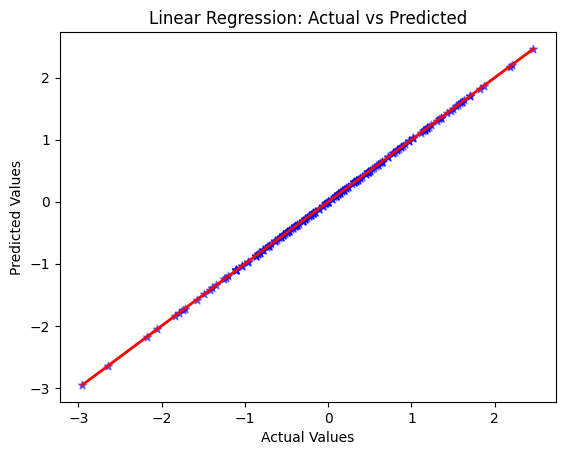

In [ ]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5,marker = '*')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()